In [ ]:
import os

os.chdir("/Users/constantin/workspace/single_cell/alphaquant_tests")

results_dir = "results"

input_file = "20210919_DIANN_SingleCellOutput.tsv"

samplemap_file = "samples.map.tsv"

samplemap_file_subset = "samples.map.shortened.tsv"

print_subsamplemap_file = True

results_dir_subset = "results_dir_subset"


# Determine single cells with many values

In [ ]:
if print_subsamplemap_file:
    import alphaquant.diffquant_utils as aqutils

    import pandas as pd
    import numpy as np

    print(os.path.abspath("."))

    aqutils.import_data(input_file)

    samplesNB, samplesTB = aqutils.get_samples_used_from_samplemap_file(samplemap_file, "NB", "TB")
    reformated_ion_df = pd.read_csv(f"{input_file}.diann_fragion_isotopes.aq_reformat.tsv", sep = "\t")

    def select_representative_cells(reformated_ion_df, samples):
        subset_df = reformated_ion_df[samples]
        num_measured_ions_df = get_df_with_num_measured_ions(subset_df)
        test_df_w_num_measured_ions(num_measured_ions_df, reformated_ion_df, sample_to_compare=samples[8])
        sorted_samples = sort_samples_by_number_detections(num_measured_ions_df)
        median_samples = select_median_samples(sorted_samples)
        return median_samples


    def get_df_with_num_measured_ions(subset_df):
        subset_df = subset_df.replace(0, np.nan)
        subset_df_notna = subset_df.notna()
        subset_measured_ions = subset_df_notna.sum()
        return subset_measured_ions


    def test_df_w_num_measured_ions(num_measured_ions_df, reformated_ion_df, sample_to_compare):
        counted_in_df = num_measured_ions_df.loc[sample_to_compare]
        counted_differently =  sum([x >0 for x in reformated_ion_df[sample_to_compare]])
        assert counted_in_df == counted_differently
        print(f"test passed {counted_in_df}=={counted_differently}")

    def sort_samples_by_number_detections(num_measured_ions_df):
        num_measured_ions_df = num_measured_ions_df.sort_values(ascending = False)
        return list(num_measured_ions_df.index)

    def select_median_samples(sorted_samples):
        median_idx = int(len(sorted_samples)/2)
        return sorted_samples[median_idx-1:median_idx+1]

    def save_shortened_samplemap(filename, list_of_samples, list_of_condnames):
        df_merged = get_shortened_samplemap(list_of_samples, list_of_condnames)
        df_merged.to_csv(filename, sep = "\t", index = None)

    def get_shortened_samplemap(list_of_samples, list_of_condnames):
        merged_samples, merged_condnames = get_merged_samples_and_condnames(list_of_samples, list_of_condnames)
        df_merged = pd.DataFrame({'sample': merged_samples, 'condition' : merged_condnames})
        return df_merged

    def get_merged_samples_and_condnames(list_of_samples, list_of_condnames):
        merged_samples = []
        merged_condnames = []
        for idx in range(len(list_of_samples)):
            condname  = list_of_condnames[idx]
            merged_samples+= list_of_samples[idx]
            merged_condnames+= get_condnames_column(list_of_samples, condname)
        return merged_samples, merged_condnames

    def get_condnames_column(samples, condname):
        return [condname for x in range(len(samples))]

    list_of_samples = [select_representative_cells(reformated_ion_df, samplesNB), select_representative_cells(reformated_ion_df, samplesTB)]
    list_of_condition = ["NB", "TB"]

    save_shortened_samplemap(samplemap_file_subset, list_of_samples=list_of_samples, list_of_condnames=list_of_condition)

/Users/constantin/workspace/single_cell/alphaquant_tests
using input type diann_fragion_isotopes
test passed 88024==88024
test passed 74846==74846


In [ ]:
import pandas as pd

pd.read_csv("20210919_DIANN_SingleCellOutput.tsv.diann_fragion_isotopes.aq_reformat.tsv")

using input type diann_fragion_isotopes
start processeing condpair ('NB', 'TB')
normalized within conditions
without missingvals (if applicable)


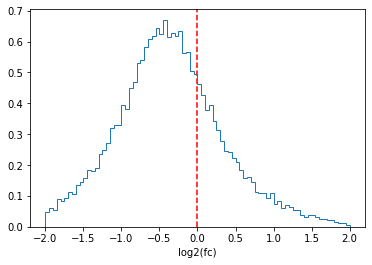

complete dataset


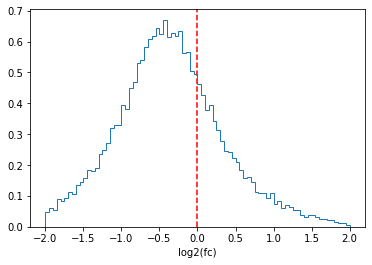

median -0.40763840633497583, mode -0.5251487617965922
using mode for shift
shift comparison by 0.5251487617965922


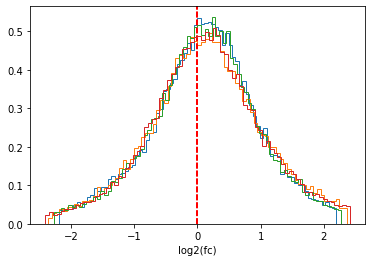

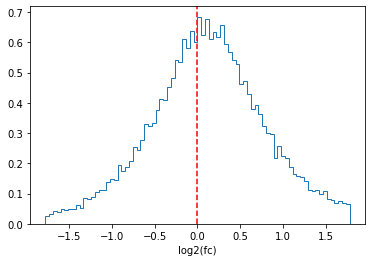

normalized between conditions
t_ion2nonan_sw 0.0981760025024414
t_intensity_selection 1.5665850639343262
t_ion2nonan_sw 0.12709879875183105
t_intensity_selection 2.0096487998962402
checked 0 of 31660 ions
checked 2000 of 31660 ions
checked 4000 of 31660 ions
checked 6000 of 31660 ions
checked 8000 of 31660 ions
checked 10000 of 31660 ions
checked 12000 of 31660 ions
checked 14000 of 31660 ions
checked 16000 of 31660 ions
checked 18000 of 31660 ions
checked 20000 of 31660 ions
checked 22000 of 31660 ions
checked 24000 of 31660 ions
checked 26000 of 31660 ions
checked 28000 of 31660 ions
checked 30000 of 31660 ions
checked 0 of 1147 prots
checked 100 of 1147 prots
checked 200 of 1147 prots
checked 300 of 1147 prots
checked 400 of 1147 prots
checked 500 of 1147 prots
checked 600 of 1147 prots
checked 700 of 1147 prots
checked 800 of 1147 prots
checked 900 of 1147 prots
checked 1000 of 1147 prots
checked 1100 of 1147 prots


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)


performed RF prediction


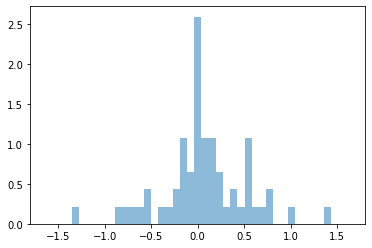

/Users/constantin/workspace/alphaquant/alphaquant/visualizations.py:1510: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/constantin/workspace/alphaquant/alphaquant/visualizations.py:1510: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/constantin/workspace/alphaquant/alphaquant/visualizations.py:1502: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Mean squared error: 0.33
Coefficient of determination: 0.13


/Users/constantin/workspace/alphaquant/alphaquant/visualizations.py:1493: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_perturb.show()


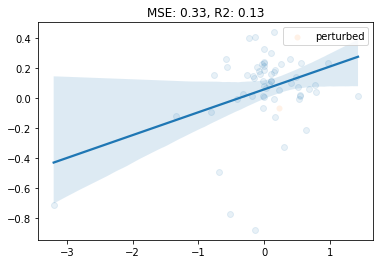

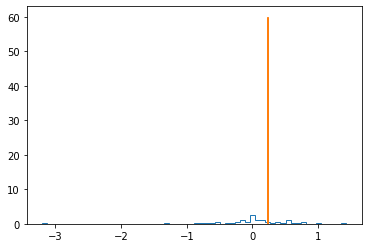

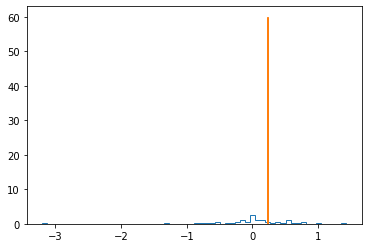

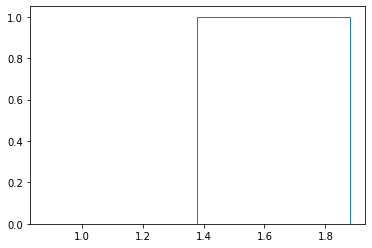

1.0 of fcs retained of 60 total


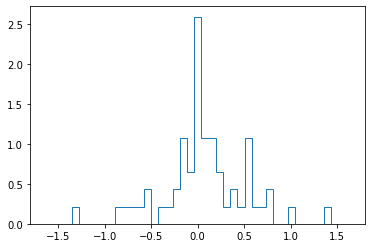

<Figure size 432x288 with 0 Axes>

0.07996871289525972	RT.Stop
0.07910776435373437	RT
0.07824944002552116	Predicted.RT
0.07311075547013943	iRT
0.06472551320291217	RT.Start
0.06466939224519971	Predicted.iRT
0.06066177325464707	MS2.Scan
0.03491578690228021	child_type_frgion_cv_fcs
0.03271118737355482	Decoy.Evidence
0.026483756081688903	child_type_frgion_frac_mainclust


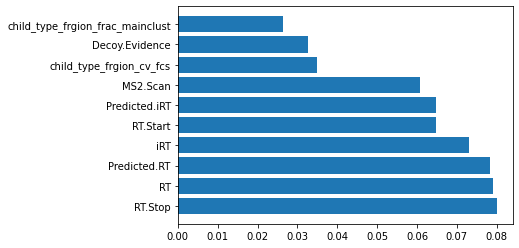

subrange: 0.33333333333333337


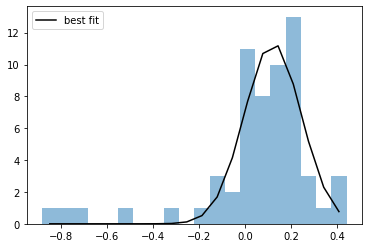

0.12369876302984842
0.12082065696081146 -0.3710962890895453 0.3710962890895453


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)


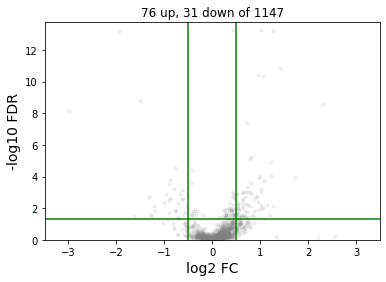

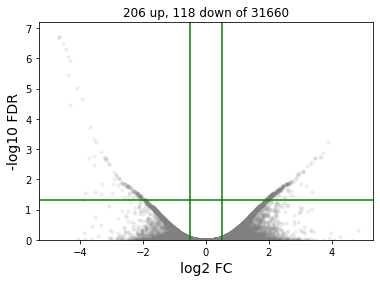

In [ ]:
import alphaquant.diff_analysis_manager as diffmgr


diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file_subset, results_dir=results_dir_subset, runtime_plots=True)

,index,-Log Student's T-test p-value NB_TB,Student's T-test q-value NB_TB,Student's T-test Difference NB_TB,Student's T-test Test statistic NB_TB,Protein.Group,Protein.Names,Genes,First.Protein.Description,-Log Student's T-test p-value NB_TB.1,Student's T-test q-value NB_TB.1,Student's T-test Difference NB_TB.1,Student's T-test Test statistic NB_TB.1,Protein.Group.1,Protein.Ids,Protein.Names.1,Genes.1,First.Protein.Description.1
0,0,20.333209,0.000000,0.658977,4.344436,E9PAV3-2,NACAM_HUMAN,NACA,"Isoform of E9PAV3, Isoform 2 of Nascent polype...",3.347528,0.033498,-0.250038,-1.485366,O43399-5,O43399-5,TPD54_HUMAN,TPD52L2,"Isoform of O43399, Isoform 5 of Tumor protein D54"
1,8,14.881659,0.000000,1.533332,6.179164,P42771,CDN2A_HUMAN,CDKN2A,Cyclin-dependent kinase inhibitor 2A,5.828815,0.006716,-0.296864,-1.889399,P39019,P39019,RS19_HUMAN,RPS19,40S ribosomal protein S19
2,10,13.457923,0.000000,0.903456,4.553620,P52292,IMA1_HUMAN,KPNA2,Importin subunit alpha-1,4.083417,0.023367,-0.257449,-1.588373,P49321,P49321,NASP_HUMAN,NASP,Nuclear autoantigenic sperm protein
3,13,13.418368,0.000000,1.023051,4.874652,P62910,RL32_HUMAN,RPL32,60S ribosomal protein L32,4.656968,0.000125,-0.807510,-2.896341,P61254,P61254,RL26_HUMAN,RPL26,60S ribosomal protein L26
4,5,12.596627,0.000000,1.322060,5.358378,P27635,RL10_HUMAN,RPL10,60S ribosomal protein L10,2.209339,0.024901,-0.349873,-1.559270,P30101,P30101,PDIA3_HUMAN,PDIA3,Protein disulfide-isomerase A3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,64,2.869614,0.004698,0.474223,1.986263,O60232,SSA27_HUMAN,SSSCA1,Sjoegren syndrome/scleroderma autoantigen 1,4.239587,0.004384,-0.368128,-1.971789,P07355,P07355,ANXA2_HUMAN,ANXA2,Annexin A2
94,69,2.752101,0.008551,0.424739,1.851913,Q04760,LGUL_HUMAN,GLO1,Lactoylglutathione lyase,3.919889,0.011920,-0.314499,-1.768647,P62857,P62857,RS28_HUMAN,RPS28,40S ribosomal protein S28
98,61,2.645106,0.003726,0.548306,2.037485,P69849,NOMO3_HUMAN,NOMO3,Nodal modulator 3,8.130025,0.000703,-0.380527,-2.394092,P62249,P62249,RS16_HUMAN,RPS16,40S ribosomal protein S16
107,68,2.425520,0.007912,0.485168,1.871459,Q02543,RL18A_HUMAN,RPL18A,60S ribosomal protein L18a,8.733080,0.000000,-0.968298,-4.088682,P62316,P62316,SMD2_HUMAN,SNRPD2,Small nuclear ribonucleoprotein Sm D2


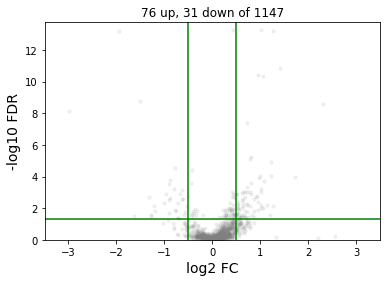

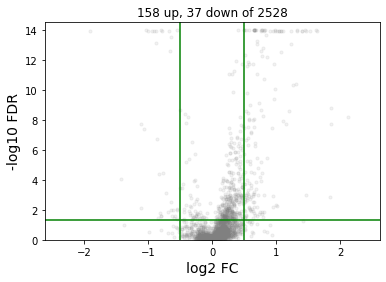

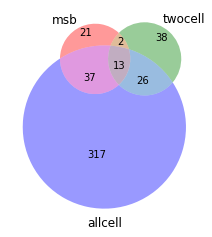

In [ ]:
import pandas as pd
import alphaquant.visualizations as aqplot
import matplotlib_venn

def get_proteins_msb():
    msb_reference = pd.read_excel("msb_ttest_data.xlsx", skiprows=[0])
    msb_reference = msb_reference.sort_values("-Log Student's T-test p-value NB_TB", ascending=False).reset_index()
    msb_reference = msb_reference[[x < 0.01 for x in msb_reference["Student's T-test q-value NB_TB"]]]
    display(msb_reference)
    proteins_msb = set(list(msb_reference["Protein.Group"]))
    return proteins_msb

def get_proteins_aq_twocell():
    aq_twocell = pd.read_csv("results_dir_subset/NB_VS_TB.results.tsv", sep = "\t")
    aq_twocell = aq_twocell.sort_values("fdr").reset_index()
    aqplot.volcano_plot(aq_twocell)
    aq_twocell_significants = aq_twocell[[x < 0.01 for x in aq_twocell["fdr"]]]
    #aq_twocell_significants = aq_twocell_significants[[abs(x)>0.5 for x in aq_twocell_significants["log2fc"]]]
    return set(list(aq_twocell_significants["protein"]))


def get_proteins_aq_allcell():
    aq_allcell = pd.read_csv("results/NB_VS_TB.results.tsv", sep = "\t")
    aq_allcell = aq_allcell.sort_values("fdr").reset_index()
    aqplot.volcano_plot(aq_allcell)
    aq_allcell_significants = aq_allcell[[x < 0.01 for x in aq_allcell["fdr"]]]
    #aq_allcell_significants = aq_allcell_significants[[abs(x)>0.5 for x in aq_allcell_significants["log2fc"]]]
    return set(list(aq_allcell_significants["protein"]))

proteins_msb = get_proteins_msb()
significants_aq_twocell = get_proteins_aq_twocell()
significants_aq_allcell = get_proteins_aq_allcell()







matplotlib_venn.venn3([proteins_msb, significants_aq_twocell, significants_aq_allcell], set_labels=['msb', 'twocell', 'allcell'])






In [ ]:
import pandas as pd

df_diann = pd.read_csv("20210919_DIANN_SingleCellOutput.tsv", sep = "\t", nrows=10000)
df_reformat = pd.read_csv("20210919_DIANN_SingleCellOutput.tsv.diann_fragion_isotopes.aq_reformat.tsv", sep = "\t", nrows=30)
for ion in df_reformat['ion']:
    print(ion)
display(df_diann)
display(df_diann.columns)
display(df_reformat)

SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_0_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_10_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_11_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_1_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_2_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_3_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_4_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_5_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_6_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_7_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_8_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_FRGION_9_
SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2_MS1ISOTOPES_2_
SEQ_WPYAGTAEAIK_MOD_WPYAGTAEAIK_CHARGE_2_FRGION_0_
SEQ_WPYAGTAEAIK_MOD_WPYAGTAEAIK_CHARGE_2_FRGION_10_
SEQ_WPYAGTAEAIK_MOD_WPYAGTAEAIK_CHARGE_2_FRGION_11_
SEQ_WPYAGTAEAIK_MOD_WPYAGTAEAIK_CHARGE_2_FRGION_1_
SEQ_WPYAGTAEAIK_MOD_WPYAGTAEAIK_CHARGE_2_FRGIO

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan,IM,iIM,Predicted.IM,Predicted.iIM
0,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_01_S3...,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,1406.010,2709.12,1755.81,1406.010,...,0.000000,-1.000000e+07,209.002;0;150.002;300.003;318.002;0;168.002;20...,209.002;0;150.002;300.003;318.002;0;168.002;20...,0.240192;0;0.800641;0.307279;0.0698223;0;0.240...,12409,1.01500,1.00583,1.01254,1.010660
1,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_02_S3...,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,5016.050,3753.62,4183.26,5016.050,...,0.000000,-1.000000e+07,1870.02;1505.01;1945.02;1005.01;1641.01;1302.0...,1870.02;1505.01;1945.02;1005.01;1641.01;1302.0...,0.803237;0.583072;0.832612;0.710685;0.957995;0...,11857,1.00958,1.00583,1.01084,1.002330
2,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_03_S3...,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,874.008,1421.65,1446.34,874.008,...,0.000000,-1.000000e+07,175.002;444.005;215.002;481.005;255.002;0;222....,175.002;444.005;215.002;481.005;255.002;0;222....,0.800641;0.473177;-0.320256;0.726277;-0.056903...,12169,1.00500,1.00583,1.01386,0.995037
3,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_04_S3...,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,2493.020,2704.21,3066.60,2493.020,...,0.000000,-1.000000e+07,968.008;418.004;932.006;413.004;1107.01;827.00...,968.008;418.004;932.006;413.004;1107.01;827.00...,0.743563;0.433673;0.850136;0.766589;0.706014;0...,12049,1.00955,1.00583,1.01211,1.002870
4,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_05_S3...,Q86U42,Q86U42,PABP2_HUMAN,PABPN1,5748.050,3258.40,3568.18,5748.050,...,0.000000,-1.000000e+07,2203.02;1996.02;1341.01;1424.01;1549.02;1339.0...,2203.02;1996.02;1341.01;1424.01;1549.02;1339.0...,0.618171;0.866855;0.755543;0.313259;0.535725;0...,12097,1.00958,1.00583,1.00985,1.002100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201010_TIMS04_Evo07_AnBr_1Cell_HeLa_TB_29_S3...,P0DP23,P0DP23,NaN,NaN,40467.200,32734.20,27765.70,NaN,...,0.000000,-1.000000e+07,10961.1;11033.1;9368.11;6539.06;8372.07;4972.0...,10961.1;11033.1;9368.11;6539.06;8372.07;4972.0...,0.898354;0.922123;0.962575;0.936876;0.972559;0...,14374,1.03545,1.02500,1.01908,1.040340
9996,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201010_TIMS04_Evo07_AnBr_1Cell_HeLa_TB_33_S3...,P0DP23,P0DP23,NaN,NaN,32691.200,26671.90,23958.70,NaN,...,1.318780,7.980180e-02,9594.09;8626.07;6101.05;5042.05;4319.03;4296.0...,9594.09;8626.07;6101.05;5042.05;4319.03;4296.0...,0.937698;0.928616;0.950292;0.928828;0.931651;0...,14326,1.03500,1.02500,1.01954,1.039310
9997,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201010_TIMS04_Evo07_AnBr_1Cell_HeLa_TB_34_S3...,P0DP23,P0DP23,NaN,NaN,27889.200,23133.50,23659.70,NaN,...,1.155340,1.504800e-01,13619.1;12558.1;8325.07;6377.06;6495.06;6458.0...,13619.1;12558.1;8325.07;6377.06;6495.06;6458.0...,0.935448;0.94424;0.930663;0.97749;0.987136;0.9...,13198,1.03958,1.02500,1.02012,1.043160
9998,D:\Andreas_Brunner\Projects\SingleCellProteomi...,20201010_TIMS04_Evo07_AnBr_1Cell_HeLa_TB_35_S3...,P0DP23,P0DP23,NaN,NaN,34494.200,28869.50,25472.20,NaN,...,1.150400,4.689690e-01,15858.2;15696.1;12367.1;7582.08;9755.08;8368.0...,15858.2;15696.1;12367.1;7582.08;9755.08;8368.0...,0.789224;0.802253;0.861396;0.768101;0.769638;0...,13654,1.03500,1.02500,1.02062,1.038190


Index(['File.Name', 'Run', 'Protein.Group', 'Protein.Ids', 'Protein.Names',
       'Genes', 'PG.Quantity', 'PG.Normalised', 'PG.MaxLFQ', 'Genes.Quantity',
       'Genes.Normalised', 'Genes.MaxLFQ', 'Genes.MaxLFQ.Unique',
       'Modified.Sequence', 'Stripped.Sequence', 'Precursor.Id',
       'Precursor.Charge', 'Q.Value', 'PEP', 'Global.Q.Value',
       'Protein.Q.Value', 'PG.Q.Value', 'Global.PG.Q.Value', 'GG.Q.Value',
       'Translated.Q.Value', 'Proteotypic', 'Precursor.Quantity',
       'Precursor.Normalised', 'Precursor.Translated', 'Ms1.Translated',
       'Quantity.Quality', 'RT', 'RT.Start', 'RT.Stop', 'iRT', 'Predicted.RT',
       'Predicted.iRT', 'First.Protein.Description', 'Lib.Q.Value',
       'Lib.PG.Q.Value', 'Ms1.Profile.Corr', 'Ms1.Area', 'Evidence',
       'Spectrum.Similarity', 'Mass.Evidence', 'CScore', 'Decoy.Evidence',
       'Decoy.CScore', 'Fragment.Quant.Raw', 'Fragment.Quant.Corrected',
       'Fragment.Correlations', 'MS2.Scan', 'IM', 'iIM', 'Predicted.IM',


,protein,ion,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_01_S3-G2_1_3873,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_02_S3-G3_1_3874,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_03_S3-G4_1_3875,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_04_S3-G5_1_3876,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_05_S3-G6_1_3877,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_06_S3-G7_1_3878,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_10_S3-G11_1_3882,20201009_TIMS04_Evo07_AnBr_1Cell_HeLa_NB_11_S3-G12_1_3883,...,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_86_S2-B2_1_5097,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_87_S2-B3_1_5098,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_88_S2-B4_1_5099,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_89_S2-B5_1_5100,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_92_S2-B8_1_5103,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_93_S2-B9_1_5104,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_94_S2-B10_1_5105,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_95_S2-B11_1_5106,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_98_S2-C2_1_5109,20201126_TIMS04_Evo07_SA_ADB_1cell_HeLa_UB_99_S2-C3_1_5110
0,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
1,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
2,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
3,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
5,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
6,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
7,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
8,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
9,A0A024RBG1,SEQ_SEQEDEVLLVSSSR_MOD_SEQEDEVLLVSSSR_CHARGE_2...,0.0,0.000,0.0,0.0000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
